In [83]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [20]:
file_less = 'data/world_bank_projects_less.json'
file_full = 'data/world_bank_projects.json'
df_less = pd.read_json(file_less)
df_full = pd.read_json(file_full)

In [3]:
df_5 = df_full[['countryshortname','project_name']]
df_5.head()

,countryshortname,project_name
0,Ethiopia,Ethiopia General Education Quality Improvement...
1,Tunisia,TN: DTF Social Protection Reforms Support
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership
4,Lesotho,Second Private Sector Competitiveness and Econ...


In [4]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
countryshortname    500 non-null object
project_name        500 non-null object
dtypes: object(2)
memory usage: 11.7+ KB


In [5]:
df_5['total_projects'] = df_5.groupby('countryshortname').transform('count')
df_5.head()

/home/salas/miniconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,countryshortname,project_name,total_projects
0,Ethiopia,Ethiopia General Education Quality Improvement...,4
1,Tunisia,TN: DTF Social Protection Reforms Support,4
2,Tuvalu,Tuvalu Aviation Investment Project - Additiona...,1
3,"Yemen, Republic of",Gov't and Civil Society Organization Partnership,13
4,Lesotho,Second Private Sector Competitiveness and Econ...,3


In [6]:
df_5 = df_5[['countryshortname', 'total_projects']]
df_5.head()

,countryshortname,total_projects
0,Ethiopia,4
1,Tunisia,4
2,Tuvalu,1
3,"Yemen, Republic of",13
4,Lesotho,3


In [7]:
by_country = df_5.groupby(['countryshortname']).count()
by_country.head()

,total_projects
countryshortname,
Afghanistan,6
Africa,11
Albania,4
Angola,1
Antigua and Barbuda,1


In [8]:
by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, Afghanistan to Zimbabwe
Data columns (total 1 columns):
total_projects    118 non-null int64
dtypes: int64(1)
memory usage: 1.8+ KB


In [11]:
by_country = by_country.sort_values('total_projects',ascending=False)
by_country.head(10)

,total_projects
countryshortname,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


In [14]:
top_10_countries = by_country.head(10)
top_10_countries

,total_projects
countryshortname,
China,19
Indonesia,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11


In [57]:
y = list(top_10_countries.total_projects)
x = list(top_10_countries.index)

['China',
 'Indonesia',
 'Vietnam',
 'India',
 'Yemen, Republic of',
 'Nepal',
 'Bangladesh',
 'Morocco',
 'Mozambique',
 'Africa']

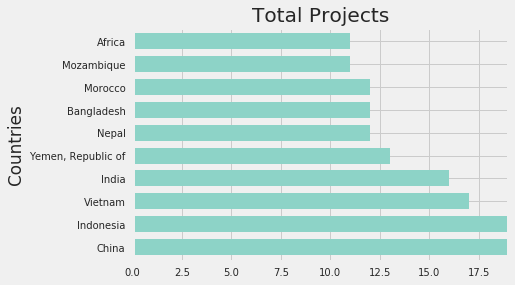

In [193]:
plt.style.use('fivethirtyeight')    
 
top_10_countries.plot(kind='barh',
                      title=title,
                      colormap='Set3',
                      xlim=[0,19],
                    legend=False,
                     width=.70)


plt.title('Total Projects')
plt.ylabel('Countries')
plt.show()

In [183]:
type(max(y))

int

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [40]:
top_10_countries.columns

Index(['total_projects'], dtype='object')

pandas.core.frame.DataFrame

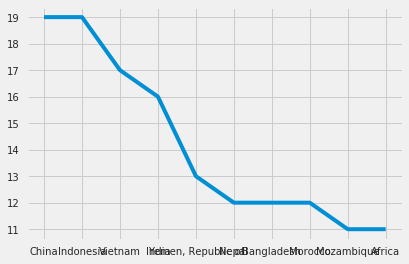

In [109]:
plt.plot(top_10_countries)

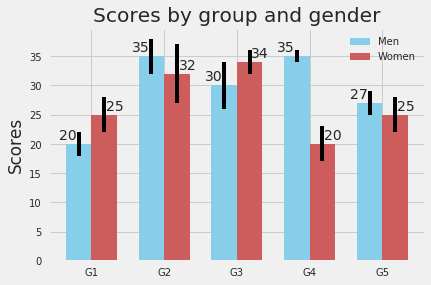

In [124]:
import numpy as np
import matplotlib.pyplot as plt

men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                color='SkyBlue', label='Men')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                color='IndianRed', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

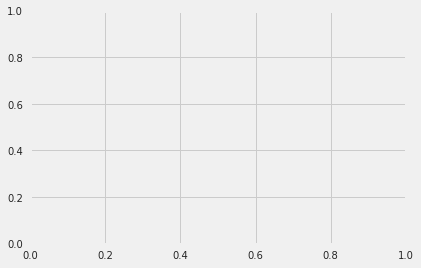

In [131]:
fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, y, width, yerr=men_std,
                color='SkyBlue', label='Men')

In [128]:
men_means

(20, 35, 30, 35, 27)

In [130]:
men_std

(2, 3, 4, 1, 2)